In [33]:
import requests
import pandas as pd

In [34]:
LINK = 'https://career.habr.com/api/frontend/vacancies?sort=relevance&type=all&divisions[]=backend&divisions[]=frontend&divisions[]=apps&divisions[]=software&divisions[]=testing&divisions[]=administration&divisions[]=analytics&divisions[]=security&divisions[]=other&currency=RUR&page={}'
NUM_OF_PAGES = 128

In [35]:
def get_info_from_page(url, page):
    json_response = requests.get(url.format(page)).json()
    if json_response.get('error'):
        print(json_response.get('error'))
        return None
    return json_response['list']

In [36]:
def sum_info_from_all_pages(url, pages):
    sum_info = []
    for page in range(pages):
        sum_info += get_info_from_page(url, page)
    return sum_info

In [37]:
info = sum_info_from_all_pages(LINK, NUM_OF_PAGES)

In [38]:
# Сохраняем полученную информацию в файл results.json:

df = pd.DataFrame(info)
df.to_json('results.json')

In [39]:
# И работаем с этим файлом:

results = pd.read_json('results.json')

print(results)

              id                   href  \
0     1000085727  /vacancies/1000085727   
1     1000085703  /vacancies/1000085703   
2     1000085704  /vacancies/1000085704   
3     1000085708  /vacancies/1000085708   
4     1000072102  /vacancies/1000072102   
...          ...                    ...   
3195  1000087430  /vacancies/1000087430   
3196  1000087429  /vacancies/1000087429   
3197  1000067464  /vacancies/1000067464   
3198  1000067052  /vacancies/1000067052   
3199  1000087422  /vacancies/1000087422   

                                                  title  isMarked  remoteWork  \
0                                  Developer С# (Cloud)      True       False   
1                                      Разработчик Java      True        True   
2                                      Java разработчик      True        True   
3                                      Разработчик Java      True        True   
4     Frontend-разработчик, React / на долгосрочный ...     False        True 

In [40]:
# Сферы деятельности:

spheres_json = results['divisions']
spheres = []
for sphere in spheres_json:
    for i in range(len(sphere)):
        spheres.append(sphere[i]['title'])
spheres = pd.Series(spheres)

print(spheres.value_counts())

Бэкенд                         955
Разработка ПО                  564
Фронтенд                       435
Аналитика                      404
Тестирование                   302
Администрирование              232
Приложения                     223
Информационная безопасность     45
Другое                          42
dtype: int64


<AxesSubplot:title={'center':'Сферы деятельности'}>

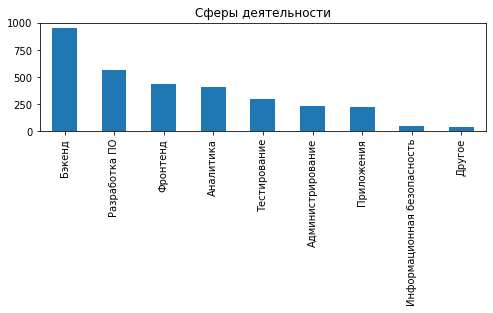

In [41]:
spheres.value_counts().plot(kind='bar',
                            figsize=(8, 2), 
                            title='Сферы деятельности')

In [42]:
# Скиллы:

skills_json = results['skills']
skills = []
for skill in skills_json:
    for i in range(len(skill)):
        skills.append(skill[i]['title'])
skills = pd.Series(skills)

print(skills.value_counts())

SQL                    649
JavaScript             551
Git                    510
PostgreSQL             450
Java                   431
                      ... 
Memcache                 1
Posix                    1
Технический перевод      1
FFmpeg                   1
Pixel-perfect            1
Length: 626, dtype: int64


<AxesSubplot:title={'center':'Скиллы (top-30)'}>

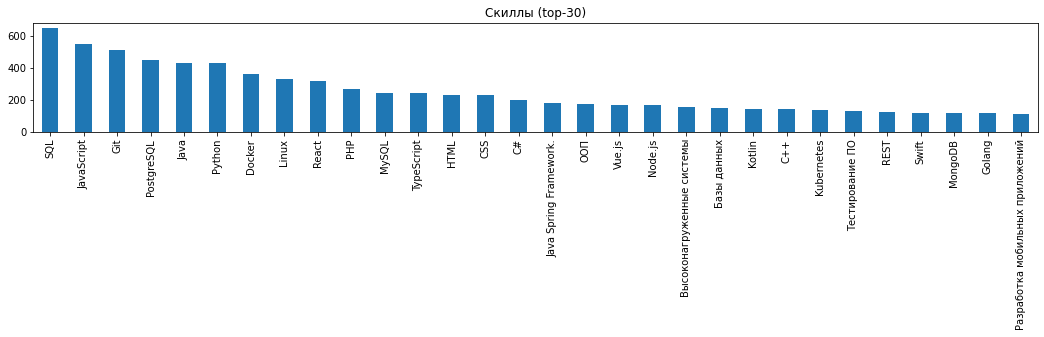

In [43]:
skills.value_counts().head(30).plot(kind='bar',
                               figsize=(18, 2), 
                               title='Скиллы (top-30)')

In [44]:
# Специальности:

titles_json = results['title']
titles = pd.Series(titles_json)
print(titles.value_counts())

Системный аналитик                                      58
Frontend-разработчик                                    22
Java Developer                                          20
QA Engineer                                             19
DevOps инженер                                          14
                                                        ..
Ведущий iOS разработчик KION                             1
Руководитель команды тестирования / AQA Team Lead        1
QA Automation engineer в on-line кинотеатр KION          1
QA&testing developer automation (Middle/Senior)          1
Software Development Engineer in Test (KUMA, Python)     1
Name: title, Length: 2475, dtype: int64


<AxesSubplot:title={'center':'Специальности (top-30)'}>

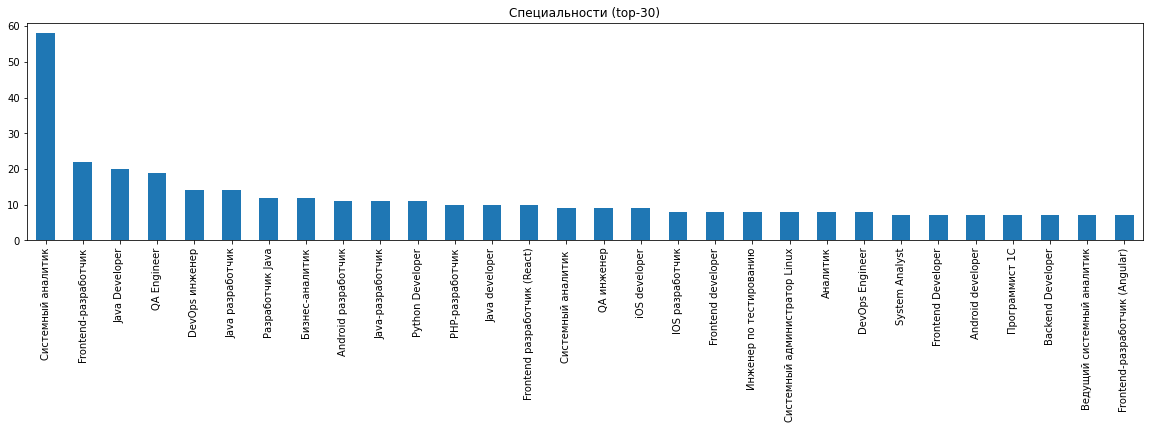

In [45]:
titles.value_counts().head(30).plot(kind='bar',
                                    figsize=(20, 4), 
                                    title='Специальности (top-30)')

In [46]:
# Удалённая работа:

remote_json = results['remoteWork']
remote = pd.Series(remote_json)
remote_rate = round(remote.sum() / remote.count() * 100)

print(f'Удалённая работа: {remote_rate} % ({remote.sum()} вакансий из {remote.count()})\n')

Удалённая работа: 75 % (2407 вакансий из 3200)

